In [1]:
using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf
Threads.nthreads()

12

In [2]:
molecule = "
Cr     0.0000000000000000        0.0000000000000000        0.0000000000000000
 C      2.2204460492503131E-016  -2.7755575615628914E-017   1.9917057295208032
 C    -0.87846650648631552        2.7526425702914095        8.6083041757504780E-002
 C     -1.0761576950394431       0.23113753473979082        2.8471318775165302
 C     -1.1834741844625540       -1.5149727689546213      -0.51720808710775112
 C    -0.64046943984698101        1.7019201793755492      -0.79113302438363120
 C     0.38313541946737661      -0.14760894947044556        4.7430917954455376
 C     -2.3981826618469495       -1.1371983499904696       -1.1629531573458314
 C    -0.78703012539088846        1.9251792729195778       -2.1766595473187929
 C    -0.94694441859747935       -2.8720274025563501      -0.28449817810753264
 C      1.2675486035981236      -0.34111643065868524        2.5473244736764737
 C      2.8532919894451458       0.81084835035514335      -0.53695345910377257
 C    -0.84768781673378957       0.16732165576408214        4.2288536707319935
 C     -2.4466354487054431       0.53405908269467073        2.3369587698900962
 C     -1.4500752689777832        4.2063918797218847       -1.7135874291038682
 C      1.8447581467596486      -0.15044875604942959      -0.74529139216019746
 C     -1.2196080072324820        3.1806521961006760       -2.6077367424376567
 C      1.4497486103270394      -0.41406740229129924        3.9104320191386206
 C     -1.8719562985282145       -3.8087564841763317      -0.76743634997262200
 C    -0.46350956422597145       0.88229951333441003       -3.2101390174352136
 C      2.0980529902698462       -1.2362018967118122       -1.5832447510334202
 C     -1.2746388876774302        4.0062097891114901      -0.35973621130034239
 C      4.3125807637164204      -0.48244848043286859       -1.9884685923416330
 C     -3.0175364813715486       -3.4167149530801062       -1.4297211076096679
 C      4.0890201693491788       0.62144735302408893       -1.1892157499516096
 C      2.6579632416610015        2.0326173172233650       0.32420185901476328
 C      3.3250466287606923       -1.4072753080589928       -2.1863969163234334
 C     -3.2910337679759127       -2.0687574123284449       -1.6030069165404066
 C     0.22769639084873555       -3.3547626604329754       0.50298336806312449
 H    -0.74908291912886749        2.5878657426972884        1.1557598548232713
 H     0.52169909423885907      -0.18865383461877616        5.8234692412657392
 H     -2.6190470124547369       -7.9615564016178836E-002  -1.3073054674813402
 H      2.1056053366359482      -0.54803621303401184        1.8817832534115551
 H     -1.6696625343573763       0.37511340509125235        4.9138939268477770
 H     -2.5159321759690250        1.5929335578216257        2.0877945479095450
 H     -3.1825360719843867       0.29121520777794885        3.1034945649271535
 H     -2.6415504618327947       -6.1674196510032475E-002   1.4452132917935852
 H     -1.7732678473955554        5.1814008611423468       -2.0782846232322365
 H     -1.3794488072567415        3.3544698802789674       -3.6718506138416998
 H      2.4232098090614969      -0.67832043096200012        4.3235223620381298
 H     -1.6799631547672826       -4.8712908083268083      -0.61824036225551382
 H      1.7818156160279486E-002   3.0582197576780185E-002  -2.7295131342096082
 H     0.20884017786450926        1.3056015319680905       -3.9563703658329579
 H     -1.3828708692567855       0.55325788080905913       -3.6945008603554528
 H      1.3086048435861439       -1.9653777659719456       -1.7653825433402255
 H     -1.4434488110406036        4.8173425991433581       0.34854817668510846
 H      5.2830227576777231      -0.61909201292002991       -2.4656172917905970
 H     -3.7084687699197083       -4.1661264770050481       -1.8158492475452319
 H      4.8817726034023723        1.3583934978819414       -1.0605535648237083
 H      1.8098085380581930        2.6076363916015639       -4.7398279383583097E-002
 H      3.5573003149848379        2.6475771565826656       0.29077695033125406
 H      2.4671355903890797        1.7251464250986643        1.3523781367055505
 H      3.5075041579243962       -2.2748837082173150       -2.8204828048481607
 H     -4.2148866134056782       -1.7551627721047318       -2.0890669144977436
 H      1.1446341708540637       -2.9565746012967433        6.8505086488290484E-002
 H     0.25662580138064695       -4.4441543959199583       0.48087599691829608
 H     0.13692099622491805       -3.0147144093110536        1.5345971594791816
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

cas_norb = 34
cas_nel =34
focc = 93 

basis = "def2-svp"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0,3,atoms,basis)

#SCF with relativistic effect
pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = true,spin =2,charge=0,
    basis = basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.UHF(pymol).x2c()
mf = pyscf.scf.UHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "cr-def2svp.fchk"
mf.init_guess = "chkfile"
# mf = mf.density_fit()
# mf.with_df.auxbasis = "weigend"
mf.run(max_cycle=200)

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

symmetry: C1

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
DIIS start cycle = 1
DIIS space = 8
SCF tol = 1e-08
SCF gradient tol = 1e-05
max. SCF cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = cr-def2svp.fchk
max_memory 4000 MB (current use 0 MB)
number electrons alpha = 111  beta = 109
init E= -2128.89850736463
  alpha nocc = 111  HOMO = -0.046107634154439  LUMO = -0.0205961023903335
  beta  nocc = 109  HOMO = -0.26038487947161  LUMO = -0.0603474267209811

WARN: system HOMO -0.046107634154439 >= system LUMO -0.0603474267209811

cycle= 1 E= -2116.31271432199  delta_E= 12.6  |g|= 1.91  |ddm|= 6.23
  alpha nocc = 111  HOMO = -0.347367844961432  LUMO = -0.340178972737044
  beta  nocc = 109  HOMO = -0.335506766680356  LUMO = -0.331210118803656
cycle= 2 E= -2095.92086650249  delta_E= 20.4  |g|= 5.41  |ddm|= 17.4
  alpha nocc = 111  HOMO = -0.

 Hartree-Fock Energy: -2118.85013131

In [15]:
using HDF5
C = mf.mo_coeff

fid = h5open("Cr_data_svp.h5", "cw")
fid["canonical_rohf_orbitals"] = C
close(fid)
display(size(C))

(2, 563, 563)

(111, 109)

(5.045643745008476, 4.602453148054188)

(34,)

(93,)

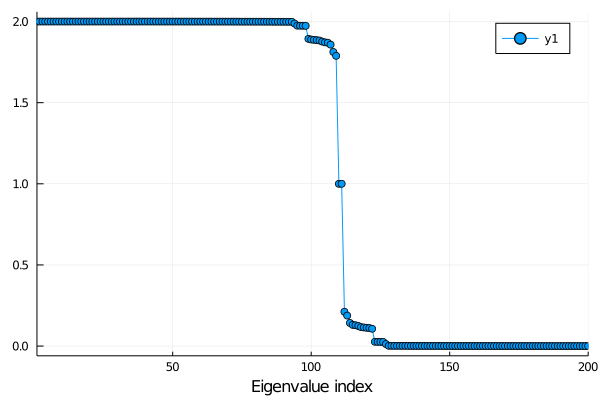

In [5]:
Ca = mf.mo_coeff[1,:,:]
Cb = mf.mo_coeff[2,:,:]
S = mf.get_ovlp()
na1 = mf.nelec[1]
nb1 = mf.nelec[2]
display((mf.nelec))

Ca_doc = Ca[:,1:na1]
Cb_doc = Cb[:,1:nb1]
Pa = Ca_doc * Ca_doc'
Pb = Cb_doc * Cb_doc'
P = Pa + Pb
P = sqrt(S)*P*sqrt(S)
P = (P + P') .* .5
F = eigen(P);
display(mf.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .002275
thresh = .005
for (idx,n) in enumerate(F.values)
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh
        if n > thresh
            push!(act_list,idx)
        end
    else
        push!(doc_list, idx)
    end
end
display(size(act_list))
display(size(doc_list))
Cact = inv(sqrt(S))*F.vectors[:,act_list]
Cdoc = inv(sqrt(S))*F.vectors[:,doc_list]
# FermiCG.pyscf_write_molden(mol, Cact, filename="Cr_uhf2_act.molden")
# FermiCG.pyscf_write_molden(mol, Cdoc, filename="Cr_uhf2_doc.molden")

p = plot( sort(F.values,rev=true), xlabel="Eigenvalue index", marker=true, xlims=(1,200))


In [6]:
# Cact_loc = FermiCG.localize(Cact, "boys", mf)
pyscflo = pyimport("pyscf.lo")
Cact_loc = pyscflo.PM(pymol).kernel(Cact, verbose=4);
FermiCG.pyscf_write_molden(mol, Cact_loc, filename="Cr_uhf2_act_loc.molden")



Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 10.085215139634  delta_f= 10.0852  |g|= 1.628  4 KF 20 Hx
macro= 2  f(x)= 15.24519330332  delta_f= 5.15998  |g|= 2.28861  4 KF 20 Hx
macro= 3  f(x)= 24.37057235446  delta_f= 9.12538  |g|= 2.36827  4 KF 20 Hx
macro= 4  f(x)= 30.855611691976  delta_f= 6.48504  |g|= 1.90738  4 KF 20 Hx
macro= 5  f(x)= 32.260341973874  delta_f= 1.40473  |g|= 1.13576  3 KF 20 Hx
macro= 6  f(x)= 32.429024169757  delta_f= 0.168682  |g|= 0.827746  2 KF 3 Hx
macro= 7  f(x)= 32.44214058291  delta_f= 0.0131164  |g|= 0.00581932  5 KF 30 Hx
macro= 8  f(x)= 32.442156402555  delta_f= 1.58196e-05  |g|= 0.00296911  3 KF 15 Hx
macro= 9  f(x)= 32.44215849644  delta_f= 2.09388e-06  |g|= 0.00219712  1 KF 3 Hx
macro= 10  f(x)= 32.442158498058  delta_f= 1.61786e-09  |g|= 5.71101e-05  1 KF 1 Hx
macro X = 10  f(x)= 32.442158498058  |g|= 5.71101e-05  20 intor 31 KF 152 Hx


1

In [7]:
#
# Using these orbitals, let's semi-algorithmically cluster the system. 
# We'll start by separately looking at the π and σ spaces
# Using these orbital orderings, we can inspect to see how local the exchange matrix is
h,j,k = FermiCG.pyscf_get_jk(mol, Pa+Pb);

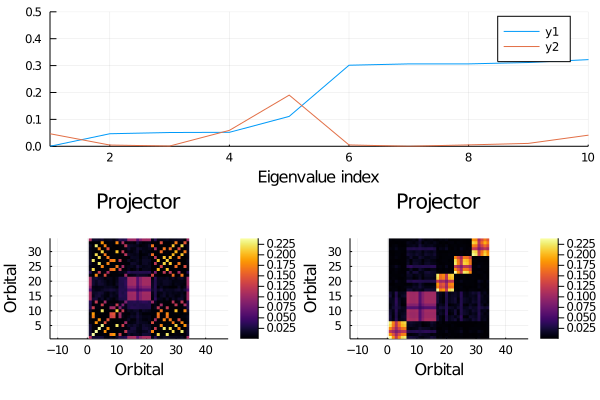

In [71]:
#
# From here, we could manually cluster. But we can instead try to use a k-means approach to spectral clustering. 
using Clustering
using SpectralClustering
using Random
Random.seed!(1)

Cact = Cact_loc

operator = h + j - .5k

nvecs = 5
k1 = Cact'* operator *Cact
A = abs.(k1)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);

p1 = plot(F.values, xlabel="Eigenvalue",xlims=(1,10))
p1 = plot!( [[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...,0], xlabel="Eigenvalue index",
    xlims=(1,10),ylims=(0,.5))

A_act = abs.(F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]')
clustering_act = clusterize(KMeansClusterizer(nvecs), A_act).assignments;
perm_act = sortperm(clustering_act)
p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")
# p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector", size = (500,500), dpi=300)
A_act = A_act[perm_act, perm_act]
p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")
# p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector", size = (500,500), dpi=300)

Cact_sorted = Cact[:,perm_act]

p4 = heatmap(A, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")
p5 = heatmap(A[perm_act, perm_act], aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")


FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted.molden");
plot(p1, p2, p3, layout = @layout [a ; b c])
# plot(p1, p2, p3, p4, p5, fontsize=2, layout = @layout [a ; b c; d e] )
# plot(p2, size = (500,500), dpi=300)

# savefig("clustering.pdf")


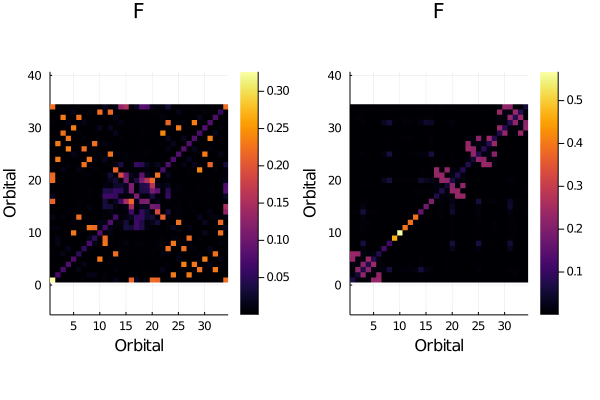

In [9]:
# The metal cluster is too big, so let's subdivide it
m = Cact_sorted[:,7:16]'*operator*Cact_sorted[:,7:16]
F = eigen(m)
Ctmp = Cact_sorted[:,7:16]*F.vectors
FermiCG.pyscf_write_molden(mol, Ctmp, filename="subdivide.molden");
Ctmp = Ctmp[:,[5,6,1,10,2,3,4,7,8,9]]

Cact_sorted[:,7:16] = Ctmp
p1 = heatmap(abs.(Cact'*operator*Cact), aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")
p2 = heatmap(abs.(Cact_sorted'*operator*Cact_sorted), aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")
display(plot(p1, p2, layout = @layout [a b] ))

FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted.molden");

In [52]:
display(F.values)

10-element Array{Float64,1}:
 -0.46348410929980133
 -0.39470069559238663
 -0.3883993453555044
 -0.3870998415853264
 -0.11543604496656248
 -0.11280197123246856
  0.15945845472928566
  0.1742000901381249
  0.19601205671581048
  0.5672318496959287

In [10]:
# # now add core back in for CASSCF
# Cfull = hcat(Cact_sorted, Cdoc);
# display(size(Cdoc))
# display(size(Cact_sorted))
# display(size(Cfull))
Cfull = Cact_sorted;

In [11]:
clusters_in = [
    (1:6),   # Benzene 1
    (7:8),   # Singly Occ d
    (9:10),  # bond/antibond 4s/sigma
    (11:16), # bond/antibond 3d/sigma
    (17:22), # Benzene 2
    (23:28), # Benzene 3
    (29:34), # Benzene 4
#     (35:127) # Doubly Occupied Space
]
init_fspace = [
    (3,3),
    (1,1),
    (1,1),
    (3,3),
    (3,3),
    (3,3),
    (3,3),
#     (93,93)
];

In [12]:
#
# Build Integrals
ints = FermiCG.pyscf_build_ints(mol, Cfull, 2*Cdoc*Cdoc');
@printf(" Ecore: %12.8f", ints.h0)


 Ecore: -2013.19429556

In [13]:
# define clusters
clusters = [Cluster(i,collect(clusters_in[i])) for i = 1:length(clusters_in)]
display(clusters)

rdm1 = zeros(size(ints.h1))
rdm1 = Cfull'*(Pa + Pb)*Cfull
rdm1 = Cfull'*sqrt(S)*Cdoc*Cdoc'*sqrt(S)*Cfull

# purify UHF density matrix for initial guess
rdm1 = .5*Cfull'*S*(Pa + Pb)*S*Cfull
rdm1 = zeros(size(ints.h1))

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


7-element Array{Cluster,1}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8])
 Cluster(3, [9, 10])
 Cluster(4, [11, 12, 13, 14, 15, 16])
 Cluster(5, [17, 18, 19, 20, 21, 22])
 Cluster(6, [23, 24, 25, 26, 27, 28])
 Cluster(7, [29, 30, 31, 32, 33, 34])

 ooCMF Iter:    1 Total= -2119.119709773630 Active= -105.925414212687 G=     3.13e-01
 ooCMF Iter:    2 Total= -2119.153252252911 Active= -105.958956691969 G=     8.35e-02
 ooCMF Iter:    3 Total= -2119.155314536996 Active= -105.961018976053 G=     4.23e-02
 ooCMF Iter:    4 Total= -2119.155912579527 Active= -105.961617018584 G=     2.66e-02
 ooCMF Iter:    5 Total= -2119.156175045224 Active= -105.961879484281 G=     2.29e-02
 ooCMF Iter:    6 Total= -2119.156465476385 Active= -105.962169915442 G=     2.00e-02
 ooCMF Iter:    7 Total= -2119.156586802083 Active= -105.962291241141 G=     8.15e-03
 ooCMF Iter:    8 Total= -2119.156608157136 Active= -105.962312596193 G=     4.59e-03
 ooCMF Iter:    9 Total= -2119.156617715512 Active= -105.962322154569 G=     4.24e-03
 ooCMF Iter:   10 Total= -2119.156630489999 Active= -105.962334929056 G=     4.71e-03
 ooCMF Iter:   11 Total= -2119.156644728813 Active= -105.962349167870 G=     4.36e-03
 ooCMF Iter:   12 Total= -2119.156652841702 Active= -1

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.119157e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.88e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.71e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.52e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.19e-13 ≰ 0.0e+00
    |g(x)|                 = 8.92e-06 ≰ 1.0e-06

 * Work counters
    Seconds run:   351  (vs limit Inf)
    Iterations:    50
    f(x) calls:    124
    ∇f(x) calls:   124


 ooCMF Iter:   51 Total= -2119.156697076504 Active= -105.962401515561 G=     4.25e-05
*ooCMF -2119.15669708 


In [14]:
# Save molden file and rotate integrals
Ccmf = Cfull * U
FermiCG.pyscf_write_molden(mol,Ccmf,filename="cmf.molden");
ints = FermiCG.orbital_rotation(ints,U);

In [15]:
e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -2119.156697076504 Active= -105.962401515561 G=     4.25e-05
 ooCMF Iter:    2 Total= -2119.156697077091 Active= -105.962401516148 G=     3.20e-05
 ooCMF Iter:    3 Total= -2119.156697077847 Active= -105.962401516904 G=     3.92e-05
 ooCMF Iter:    4 Total= -2119.156697078596 Active= -105.962401517653 G=     2.67e-05
 ooCMF Iter:    5 Total= -2119.156697078862 Active= -105.962401517919 G=     1.76e-05
 ooCMF Iter:    6 Total= -2119.156697079050 Active= -105.962401518108 G=     1.75e-05
 ooCMF Iter:    7 Total= -2119.156697079193 Active= -105.962401518250 G=     1.44e-05
 ooCMF Iter:    8 Total= -2119.156697079272 Active= -105.962401518329 G=     1.25e-05
 ooCMF Iter:    9 Total= -2119.156697079328 Active= -105.962401518385 G=     9.01e-06


 * Status: success

 * Candidate solution
    Final objective value:     -2.119157e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.26e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.55e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.23e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.05e-14 ≰ 0.0e+00
    |g(x)|                 = 9.54e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   57  (vs limit Inf)
    Iterations:    9
    f(x) calls:    21
    ∇f(x) calls:   21


 ooCMF Iter:   10 Total= -2119.156697079351 Active= -105.962401518408 G=     4.70e-06
*ooCMF -2119.15669708 


In [16]:
# Save molden file and rotate integrals
Ccmf = Ccmf * U
FermiCG.pyscf_write_molden(mol,Ccmf,filename="cmf.molden");
ints = FermiCG.orbital_rotation(ints,U);

In [51]:
np = pyimport("numpy")
np.save("h_act0.npy",ints.h0)
np.save("h_act1.npy",ints.h1)
np.save("h_act2.npy",ints.h2) 
np.save("C_act.npy",Ccmf) 
np.save("C_doc.npy",Cdoc) 

In [17]:

max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);

In [18]:
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);


 Remove duplicates
 Number of terms reduced from  9667 to  4039


In [19]:
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

In [20]:
p_spaces = Vector{FermiCG.ClusterSubspace}()
q_spaces = Vector{FermiCG.ClusterSubspace}()

# define p spaces
for ci in clusters
    tss = FermiCG.ClusterSubspace(ci)
    tss[init_fspace[ci.idx]] = 1:1
    push!(p_spaces, tss)
end

# define q spaces
for tssp in p_spaces
    tss = FermiCG.get_ortho_compliment(tssp, cluster_bases[tssp.cluster.idx])
    push!(q_spaces, tss)
end

println(" ================= Cluster P Spaces ===================")
display.(p_spaces);
println(" ================= Cluster Q Spaces ===================")
display.(q_spaces);

 ================= Cluster P Spaces ===================
 Subspace for Cluster:    1 : IDX001:DIM4096:001|002|003|004|005|006|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    2 : IDX002:DIM0016:007|008|
      (1, 1)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    3 : IDX003:DIM0016:009|010|
      (1, 1)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    4 : IDX004:DIM4096:011|012|013|014|015|016|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    5 : IDX005:DIM4096:017|018|019|020|021|022|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    6 : IDX006:DIM4096:023|024|025|026|027|028|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    7 : IDX007:DIM4096:029|030|031|032|033|034|
      (3, 3)   Range:    1 → 1    Dim    1
 ================= Cluster Q Spaces ===================
 Subspace for Cluster:    1 : IDX001:DIM4096:001|002|003|004|005|006|
      (0, 0)   Range:    1 → 1    Dim    1
      (3, 6)   R

      (3, 1)   Range:    1 → 100  Dim  100
      (4, 5)   Range:    1 → 90   Dim   90
      (4, 0)   Range:    1 → 15   Dim   15
      (2, 4)   Range:    1 → 100  Dim  100
      (6, 5)   Range:    1 → 6    Dim    6
      (1, 2)   Range:    1 → 90   Dim   90
      (5, 1)   Range:    1 → 36   Dim   36
      (3, 4)   Range:    1 → 100  Dim  100
      (2, 3)   Range:    1 → 100  Dim  100
      (2, 6)   Range:    1 → 15   Dim   15
      (0, 5)   Range:    1 → 6    Dim    6
      (5, 4)   Range:    1 → 90   Dim   90
      (2, 1)   Range:    1 → 90   Dim   90
      (2, 5)   Range:    1 → 90   Dim   90
      (1, 4)   Range:    1 → 90   Dim   90
      (0, 1)   Range:    1 → 6    Dim    6
      (0, 6)   Range:    1 → 1    Dim    1
      (1, 1)   Range:    1 → 36   Dim   36
      (2, 2)   Range:    1 → 100  Dim  100
      (5, 0)   Range:    1 → 6    Dim    6
      (6, 3)   Range:    1 → 20   Dim   20
      (2, 0)   Range:    1 → 15   Dim   15
      (6, 1)   Range:    1 → 6    Dim    6
      (1, 3

In [21]:
nroots = 1
ref_vector = FermiCG.TuckerState(clusters, p_spaces, q_spaces, 17,17)
#
# initialize with eye
FermiCG.set_vector!(ref_vector, Matrix(1.0I, length(ref_vector),nroots))

ref  = FermiCG.CompressedTuckerState(ref_vector, thresh=-1);


In [22]:
# Solve for reference state (should be CMF energy)
@time e_ref, ref = FermiCG.tucker_ci_solve(ref, cluster_ops, clustered_ham, tol=1e-5);
display(ref)

 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  6.755970 seconds (21.78 M allocations: 1.035 GiB, 7.93% gc time)

 --------------------------------------------------
 ---------- # Fockspaces -------------------:     1  
 ---------- # Configs    -------------------:     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # configs (full)    (α,β)...            
 -------             --------- --------- ----------          
 1.000                                   ( 3,3 )( 1,1 )( 1,1 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )
     1.000           1         1             1:1    1:1    1:1    1:1    1:1    1:1    1:1
 ---------                               ----------          
 --------------------------------------------------



In [23]:
# 
# Compute CMF Mean-field Zeroth-Order Hamiltonian
# display(typeof(cluster_ops))
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db);

In [24]:
# Solve for target
e_var, v_var = FermiCG.solve_for_compressed_space(ref, cluster_ops, clustered_ham, 
    nbody=2, 
    H0="Hcmf",
    thresh_foi=1e-7, 
    thresh_pt =1e-5, 
    thresh_var=1e-3, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:        1 →        1 (thresh =  1.0e-03)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  0.009889 seconds (19.90 k allocations: 1.109 MiB)

 Compute first order wavefunction. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 2
  9.654756 seconds (29.46 M allocations: 2.063 GiB, 9.17% gc time)
 FOIS Compressed from:         6432 →     1162 (thresh =  1.0e-07)
 Norm of |1>:              11228.43823816 
 Overlap between <1|0>:    -1.1e+02

 Compute PT vector. Reference space dim = 1
 Length of input      FOIS: 1162
 Length of compressed FOIS: 1162
 Build exact <X|V|0>
  7.495287 seco

 Iter:   1 SS: 1    E: -105.99863654   R: 1.0e-01  
 Iter:   2 SS: 2    E: -106.00893703   R: 4.0e-02  
 Iter:   3 SS: 3    E: -106.01058062   R: 1.8e-02  
 Iter:   4 SS: 4    E: -106.01085687   R: 9.2e-03  
 Iter:   5 SS: 5    E: -106.01094224   R: 4.7e-03  
 Iter:   6 SS: 6    E: -106.01096621   R: 2.7e-03  
 Iter:   7 SS: 7    E: -106.01097461   R: 1.4e-03  
 Iter:   8 SS: 8    E: -106.01097663   R: 6.6e-04  
 Iter:   9 SS: 9    E: -106.01097715   R: 4.3e-04  
 Iter:  10 SS: 10   E: -106.01097736   R: 2.5e-04  
 Iter:  11 SS: 11   E: -106.01097744   R: 1.0e-04  
 Iter:  12 SS: 12   E: -106.01097745   R: 4.5e-05  
 Iter:  13 SS: 13   E: -106.01097745   R: 1.8e-05  
 Iter:  14 SS: 14   E: -106.01097745*  R: 8.1e-06* 
 Memory used by cache: 258496.0
 12.362889 seconds (65.66 M allocations: 8.187 GiB, 16.51% gc time)
 E(Ref)      = -105.99863654
 E(PT2) tot  = -106.00541091
 E(var) tot  = -106.01097745
 --------------------------------------------------------------------
 Iterate PT-Var

In [25]:
# Solve for target
e_var2, v_var2 = FermiCG.solve_for_compressed_space(v_var, cluster_ops, clustered_ham, 
    nbody=3, 
    H0="Hcmf",
    thresh_foi=1e-8, 
    thresh_pt =1e-5, 
    thresh_var=1e-3, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:      342 →       18 (thresh =  1.0e-03)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =         18
 Solve CI with # variables = 18
 Iter:   1 SS: 1    E: -105.99857155   R: 5.5e-03  
 Iter:   2 SS: 2    E: -105.99863449   R: 4.3e-03  
 Iter:   3 SS: 3    E: -105.99866651   R: 1.2e-03  
 Iter:   4 SS: 4    E: -105.99866819   R: 2.6e-04  
 Iter:   5 SS: 5    E: -105.99866825   R: 3.5e-05  
 Iter:   6 SS: 6    E: -105.99866825*  R: 2.8e-06* 
 Memory used by cache: 258496.0
  0.624032 seconds (1.31 M allocations: 414.443 MiB, 6.85% gc time)

 Compute first order wavefunction. Reference space dim = 18
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 3
 72.192646 seconds (95.33 M allocations: 30.095 GiB, 8.86% gc time)
 FOIS Compress

 Norm of <X|F|0> =  36.25020076
  1	9.99e-02
  2	6.43e-02
  3	6.64e-02
  4	1.00e-01
  5	1.50e-01
  6	2.56e-01
  7	5.14e+00
  8	2.63e-01
  9	1.58e-01
 10	9.94e-02
 11	6.09e-02
 12	4.28e-02
 13	2.34e-02
 14	1.31e-02
 15	7.60e-03
 16	4.84e-03
 17	3.69e-03
 18	2.30e-03
 19	1.49e-03
 20	8.72e-04
 21	5.17e-04
 22	2.81e-04
 23	1.81e-04
 24	1.21e-04
 25	7.34e-05
 26	4.36e-05
 27	2.44e-05
 28	1.51e-05
 29	8.91e-06

 51.873386 seconds (2.86 G allocations: 117.817 GiB, 34.25% gc time)
 <A|X>C(X) =   1.00000927
 <1|1> =   1.03499200
 <0|H|1> = -106.02822048
 E(PT2)  = -106.01271703
 PT   Compressed from:        33231 →      439 (thresh =  1.0e-05)
 Norm of |1>:                1.03270269 
 Overlap between <1|0>:     1.0e+00

 Solve in compressed FOIS. Dimension =          487
 Solve CI with # variables = 487
 Iter:   1 SS: 1    E: -105.99819632   R: 1.6e-01  
 Iter:   2 SS: 2    E: -106.02437825   R: 4.8e-02  
 Iter:   3 SS: 3    E: -106.02655698   R: 2.1e-02  
 Iter:   4 SS: 4    E: -106.02693877 

## Now do full 4 body search

In [26]:
# Solve for target
e_var2, v_var2 = FermiCG.solve_for_compressed_space(v_var, cluster_ops, clustered_ham, 
    nbody=4, 
    H0="Hcmf",
    thresh_foi=1e-8, 
    thresh_pt =1e-5, 
    thresh_var=1e-3, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:      342 →       18 (thresh =  1.0e-03)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =         18
 Solve CI with # variables = 18
 Iter:   1 SS: 1    E: -105.99857155   R: 5.5e-03  
 Iter:   2 SS: 2    E: -105.99863449   R: 4.3e-03  
 Iter:   3 SS: 3    E: -105.99866651   R: 1.2e-03  
 Iter:   4 SS: 4    E: -105.99866819   R: 2.6e-04  
 Iter:   5 SS: 5    E: -105.99866825   R: 3.5e-05  
 Iter:   6 SS: 6    E: -105.99866825*  R: 2.8e-06* 
 Memory used by cache: 258496.0
  0.480133 seconds (1.42 M allocations: 477.830 MiB, 8.83% gc time)

 Compute first order wavefunction. Reference space dim = 18
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 82.118421 seconds (118.49 M allocations: 37.503 GiB, 9.63% gc time)
 FOIS Compres

  1	9.99e-02
  2	6.44e-02
  3	6.64e-02
  4	1.00e-01
  5	1.50e-01
  6	2.56e-01
  7	4.91e+00
  8	2.64e-01
  9	1.58e-01
 10	9.97e-02
 11	6.09e-02
 12	4.29e-02
 13	2.35e-02
 14	1.31e-02
 15	7.61e-03
 16	4.85e-03
 17	3.69e-03
 18	2.30e-03
 19	1.49e-03
 20	8.73e-04
 21	5.19e-04
 22	2.81e-04
 23	1.81e-04
 24	1.21e-04
 25	7.36e-05
 26	4.36e-05
 27	2.44e-05
 28	1.51e-05
 29	8.94e-06

 82.318828 seconds (4.85 G allocations: 186.505 GiB, 33.63% gc time)
 <A|X>C(X) =   1.00000924
 <1|1> =   1.03513463
 <0|H|1> = -106.02841880
 E(PT2)  = -106.01281781
 PT   Compressed from:        38183 →      439 (thresh =  1.0e-05)
 Norm of |1>:                1.03270289 
 Overlap between <1|0>:     1.0e+00

 Solve in compressed FOIS. Dimension =          487
 Solve CI with # variables = 487
 Iter:   1 SS: 1    E: -105.99819632   R: 1.6e-01  
 Iter:   2 SS: 2    E: -106.02437852   R: 4.8e-02  
 Iter:   3 SS: 3    E: -106.02655725   R: 2.1e-02  
 Iter:   4 SS: 4    E: -106.02693905   R: 1.0e-02  
 Iter:   5 SS: 5 

In [30]:
display(v_var2)
display(FermiCG.compress(v_var2, thresh=1e-3))



 --------------------------------------------------
 ---------- # Fockspaces -------------------:   165  
 ---------- # Configs    -------------------:   487  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # configs (full)    (α,β)...            
 -------             --------- --------- ----------          
 0.916                                   ( 3,3 )( 1,1 )( 1,1 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )
     0.899           1         1             1:1    1:1    1:1    1:1    1:1    1:1    1:1
     0.003           16        9801          1:1    1:1    1:1  2:100  2:100    1:1    1:1
     0.003           16        9801          1:1    1:1    1:1  2:100    1:1    1:1  2:100
     0.002           16        9801        2:100    1:1    1:1  2:100    1:1    1:1    1:1
     0.003           12        297           1:1    1:1    2:4  2:100    1:1    1:1    1:1
     0.003           16        9801          1:1    1:1    1:1  2:100 

In [31]:
# now do PT2 correction to see how close we are
e_pt2, v_pt2 = FermiCG.do_fois_pt2(v_var2, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8)


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 487

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =        487
 Solve CI with # variables = 487
 Iter:   1 SS: 1    E: -106.02707946   R: 7.3e-06  
 Iter:   2 SS: 2    E: -106.02707946   R: 4.1e-06  
 Iter:   3 SS: 3    E: -106.02707946   R: 2.0e-06  
 Iter:   4 SS: 4    E: -106.02707946   R: 8.8e-07  
 Iter:   5 SS: 5    E: -106.02707946   R: 4.0e-07  
 Iter:   6 SS: 6    E: -106.02707946   R: 2.4e-07  
 Iter:   7 SS: 7    E: -106.02707946   R: 1.4e-07  
 Iter:   8 SS: 8    E: -106.02707946   R: 7.5e-08  
 Iter:   9 SS: 9    E: -106.02707946   R: 3.5e-08  
 Iter:  10 SS: 10   E: -106.02707946   R: 1.8e-08  
 Iter:  11 SS: 11   E: -106.02707946   R: 1.0e-08  
 Iter:  12 SS: 12   E: -106.02707946*  R: 5.3e-09* 
 Memory used by cache:

(-106.0333202837422, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([-6.557091579932092e-5], ([1.0], [-0.9789164199806407; -0.20426121191328947], [0.9997354171592555; -0.023002079849640995], [1.0], [1.0], [-0.734059307340079; 0.2677693257316971; … ; -0.0038888752634060387; -7.688674028090637e-16], [-0.2519918815964311; 0.8406591391303683; … ; -1.7999789899694945e-16; 7.80006849961331

## Extrapolate using PT2 energies 

In [103]:
# now do PT2 correction to see how close we are
comp1 = FermiCG.compress(v_var2, thresh=1e-1)
discarded_weight1 = 1-sqrt(FermiCG.orth_dot(comp1,comp1))
display(discarded_weight1)
FermiCG.normalize!(comp1)
e_pt2_1, v_pt2_1 = FermiCG.do_fois_pt2(comp1, cluster_ops, clustered_ham, thresh_foi=1e-9, max_iter=50, tol=1e-8);

0.051835668286198455


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-09 
   nbody                   = 4

   Length of Reference     = 1

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  0.348952 seconds (165.30 k allocations: 7.581 MiB)

 Compute FOIS. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
  5.971481 seconds (8.16 M allocations: 2.644 GiB, 16.04% gc time)
 FOIS Compressed from:        48077 →    37266 (thresh =  1.0e-09)
 Norm of |1>:               5.7e-02 →  5.7e-02 (thresh =  1.0e-09)
 Overlap between <1|0>:     0.0e+00
 Compute PT vector. Reference space dim = 1
 Length of input      FOIS: 37266
 Length of compressed FOIS: 37266
 Build exact <X|V|0>
  0.163651 seconds (725.47 k a

In [104]:
# now do PT2 correction to see how close we are
comp2 = FermiCG.compress(v_var2, thresh=1e-2)
discarded_weight2 = 1-sqrt(FermiCG.orth_dot(comp2,comp2))
display(discarded_weight2)
FermiCG.normalize!(comp2)
e_pt2_2, v_pt2_2 = FermiCG.do_fois_pt2(comp2, cluster_ops, clustered_ham, thresh_foi=1e-9, max_iter=50, tol=1e-8);

0.030299047858351358


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-09 
   nbody                   = 4

   Length of Reference     = 3

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =          3
 Solve CI with # variables = 3
 Iter:   1 SS: 1    E: -105.97302623   R: 2.7e-03  
 Iter:   2 SS: 2    E: -105.97306018*  R: 3.6e-15* 
 Memory used by cache: 258496.0
  0.084076 seconds (69.15 k allocations: 17.774 MiB, 23.03% gc time)

 Compute FOIS. Reference space dim = 3
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 15.983671 seconds (20.68 M allocations: 6.950 GiB, 15.07% gc time)
 FOIS Compressed from:       131620 →    51383 (thresh =  1.0e-09)
 Norm of |1>:               5.5e-02 →  5.5e-02 (thresh =  1.0e-09)
 Overlap between <1|0>:     6.5e-15
 Compute PT vector. Reference space dim = 3
 Length of input      FOIS: 51383
 Length of compr

In [105]:
# now do PT2 correction to see how close we are
comp3 = FermiCG.compress(v_var2, thresh=1e-3)
discarded_weight3 = 1-sqrt(FermiCG.orth_dot(comp3,comp3))
display(discarded_weight3)
FermiCG.normalize!(comp3)
e_pt2_3, v_pt2_3 = FermiCG.do_fois_pt2(comp3, cluster_ops, clustered_ham, thresh_foi=1e-9, max_iter=50, tol=1e-8);

0.017443333041315845


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-09 
   nbody                   = 4

   Length of Reference     = 17

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =         17
 Solve CI with # variables = 17
 Iter:   1 SS: 1    E: -105.99817964   R: 3.9e-03  
 Iter:   2 SS: 2    E: -105.99819810   R: 1.8e-03  
 Iter:   3 SS: 3    E: -105.99820745   R: 8.9e-04  
 Iter:   4 SS: 4    E: -105.99820840   R: 1.5e-04  
 Iter:   5 SS: 5    E: -105.99820842   R: 3.7e-05  
 Iter:   6 SS: 6    E: -105.99820842   R: 4.0e-06  
 Iter:   7 SS: 7    E: -105.99820842   R: 2.0e-07  
 Iter:   8 SS: 8    E: -105.99820842*  R: 5.3e-09* 
 Memory used by cache: 258496.0
  0.685830 seconds (1.43 M allocations: 418.048 MiB, 38.02% gc time)

 Compute FOIS. Reference space dim = 17
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 80.344933 second

In [106]:
# now do PT2 correction to see how close we are
comp4 = FermiCG.compress(v_var2, thresh=1e-4)
discarded_weight4 = 1-sqrt(FermiCG.orth_dot(comp4,comp4))
display(discarded_weight4)
FermiCG.normalize!(comp4)
e_pt2_4, v_pt2_4 = FermiCG.do_fois_pt2(comp4, cluster_ops, clustered_ham, thresh_foi=1e-9, max_iter=50, tol=1e-8);

0.0040666231694049815


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-09 
   nbody                   = 4

   Length of Reference     = 113

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =        113
 Solve CI with # variables = 113
 Iter:   1 SS: 1    E: -106.01950779   R: 6.5e-03  
 Iter:   2 SS: 2    E: -106.01957838   R: 3.9e-03  
 Iter:   3 SS: 3    E: -106.01960802   R: 1.8e-03  
 Iter:   4 SS: 4    E: -106.01961192   R: 4.9e-04  
 Iter:   5 SS: 5    E: -106.01961217   R: 2.2e-04  
 Iter:   6 SS: 6    E: -106.01961223   R: 9.4e-05  
 Iter:   7 SS: 7    E: -106.01961224   R: 2.1e-05  
 Iter:   8 SS: 8    E: -106.01961224   R: 7.5e-06  
 Iter:   9 SS: 9    E: -106.01961224   R: 2.2e-06  
 Iter:  10 SS: 10   E: -106.01961224   R: 5.5e-07  
 Iter:  11 SS: 11   E: -106.01961224   R: 1.3e-07  
 Iter:  12 SS: 12   E: -106.01961224   R: 4.5e-08  
 Iter:  13 SS: 13   E:

In [78]:
x = [
    -0.068,
-0.056,
-0.029,
-0.012,
-0.006,
-0.004106]
y = [
    -105.962,
-105.973,
-105.998,
-106.020,
-106.027,
-106.030
]
linreg(x, y) -> a, b
p = plot( x, y, xlabel="PT2 Correlation Energy",ylabel="Variational Energy", marker=true,)


LoadError: syntax: "linreg(x, y)" is not a valid function argument name around In[78]:16

## Now decrease `thresh_pt=1e-6`

In [44]:
# Solve for target
e_var3, v_var3 = FermiCG.solve_for_compressed_space(v_var2, cluster_ops, clustered_ham, 
    nbody=4, 
    H0="Hcmf",
    thresh_foi=1e-8, 
    thresh_pt =1e-6, 
    thresh_var=1e-3, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:      487 →       17 (thresh =  1.0e-03)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =         17
 Solve CI with # variables = 17
 Iter:   1 SS: 1    E: -105.99817964   R: 3.9e-03  
 Iter:   2 SS: 2    E: -105.99819810   R: 1.8e-03  
 Iter:   3 SS: 3    E: -105.99820745   R: 8.9e-04  
 Iter:   4 SS: 4    E: -105.99820840   R: 1.5e-04  
 Iter:   5 SS: 5    E: -105.99820842   R: 3.7e-05  
 Iter:   6 SS: 6    E: -105.99820842*  R: 4.0e-06* 
 Memory used by cache: 258496.0
  0.432215 seconds (1.18 M allocations: 406.182 MiB, 6.66% gc time)

 Compute first order wavefunction. Reference space dim = 17
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 75.914759 seconds (100.35 M allocations: 34.862 GiB, 10.63% gc time)
 FOIS Compre

In [48]:
# now do PT2 correction to see how close we are
e_pt3, v_pt3 = FermiCG.do_fois_pt2(v_var3, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8);


-------------------------------------------------------
 Do Hylleraas PT2
   H0                      = Hcmf
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 1634

-------------------------------------------------------
 Solve zeroth-order problem. Dimension =       1634
 Solve CI with # variables = 1634
 Iter:   1 SS: 1    E: -106.02983596   R: 7.3e-06  
 Iter:   2 SS: 2    E: -106.02983596   R: 3.8e-06  
 Iter:   3 SS: 3    E: -106.02983596   R: 2.1e-06  
 Iter:   4 SS: 4    E: -106.02983596   R: 9.8e-07  
 Iter:   5 SS: 5    E: -106.02983596   R: 4.4e-07  
 Iter:   6 SS: 6    E: -106.02983596   R: 1.9e-07  
 Iter:   7 SS: 7    E: -106.02983596   R: 1.0e-07  
 Iter:   8 SS: 8    E: -106.02983596   R: 5.4e-08  
 Iter:   9 SS: 9    E: -106.02983596   R: 2.9e-08  
 Iter:  10 SS: 10   E: -106.02983596   R: 1.5e-08  
 Iter:  11 SS: 11   E: -106.02983596*  R: 9.5e-09* 
 Memory used by cache: 258496.0
129.327208 seconds (550.53 M allocations

(-106.0339422321401, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([6.873473571490521e-5], ([1.0], [-0.9789164199806407; -0.20426121191328958], [0.9997354171592555; -0.02300207984964099], [1.0], [1.0], [-0.7340593073400788; 0.267769325731697; … ; -0.0038888752634060335; -7.688674028090633e-16], [-0.25199188159643116; 0.8406591391303682; … ; -1.7999789899694874e-16; 7.800068499613315

In [49]:
display(v_pt3)



 --------------------------------------------------
 ---------- # Fockspaces -------------------:  6997  
 ---------- # Configs    -------------------: 266132  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # configs (full)    (α,β)...            
 -------             --------- --------- ----------          
 0.004                                   ( 3,3 )( 1,1 )( 0,1 )( 4,3 )( 3,3 )( 3,3 )( 3,3 )
     0.000           4         200           1:1    1:1    1:2  1:100    1:1    1:1    1:1
     0.001           308       19800         1:1    1:1    1:2  1:100    1:1    1:1  2:100
     0.001           260       19800         1:1    1:1    1:2  1:100  2:100    1:1    1:1
     0.000           1176      1960200       1:1    1:1    1:2  1:100  2:100    1:1  2:100
     0.001           286       19800       2:100    1:1    1:2  1:100    1:1    1:1    1:1
     0.000           924       1960200     2:100    1:1    1:2  1:100

     0.000           154       19800         1:1    1:1    1:2  1:100    1:1  2:100    1:1
     0.000           648       1960200     2:100    1:1    1:2  1:100  2:100    1:1    1:1
     0.000           720       1960200     2:100    1:1    1:2  1:100    1:1    1:1  2:100
     0.000           600       1960200       1:1    1:1    1:2  1:100    1:1  2:100  2:100
     0.000           36        59400         1:1    2:4    1:2  1:100    1:1  2:100    1:1
     0.000           36        59400         1:1    2:4    1:2  1:100  2:100    1:1    1:1
     0.000           500       1960200       1:1    1:1    1:2  1:100  2:100    1:1  2:100
     0.000           792       1960200       1:1    1:1    1:2  1:100  2:100  2:100    1:1
     0.000           500       1960200     2:100    1:1    1:2  1:100    1:1  2:100    1:1
     0.000           4         600           1:1    2:4    1:2  1:100    1:1    1:1    1:1
     0.000           36        59400         1:1    2:4    1:2  1:100    1:1    1:1  2:100

## CEPA
Do a series of CEPA calculations starting from different compression levels of the best variational state obtained

In [79]:
comp1 = FermiCG.compress(v_var2, thresh=1e-1)
discarded_weight1 = 1-sqrt(FermiCG.orth_dot(comp1,comp1))
display(discarded_weight1)
FermiCG.normalize!(comp1)
e_cepa1, v_cepa1 = FermiCG.do_fois_cepa(comp1, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8)


0.051835668286198455


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 1

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  3.253496 seconds (953.71 k allocations: 199.621 MiB, 7.90% gc time)

 Compute FOIS. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 17.262980 seconds (8.09 M allocations: 2.605 GiB, 4.29% gc time)
 FOIS Compressed from:        20438 →    12721 (thresh =  1.0e-08)
 Norm of |1>:                0.05705001 
 Overlap between <1|0>:     0.0e+00

 Do CEPA: Dim = 12721
 Reference Energy: -105.96240152
 Overlap between <0|0>:           1.0e+00
 Overlap between <1|0>:           0.0e+00
 Overlap between <1|1>:           0.0e+00
 Norm of Sx overlap:   0.00000000

(-106.03576862804101, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([-0.00011822348946709343], ([1.0], [-0.9789164199806407; -0.20426121191328947], [0.9997354171592555; -0.02300207984964097], [1.0], [1.0], [-0.7340593073400788; 0.26776932573169687; … ; -0.0038888752634060326; -7.688674028090634e-16], [-0.25199188159643116; 0.840659139130368; … ; -1.799978989969487e-16; 7.80006849961

In [80]:
comp2 = FermiCG.compress(v_var2, thresh=1e-2)
discarded_weight2 = 1-sqrt(FermiCG.orth_dot(comp2,comp2))
display(discarded_weight2)
FermiCG.normalize!(comp2)
e_cepa2, v_cepa2 = FermiCG.do_fois_cepa(comp2, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8)


0.030299047858351358


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 3

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =          3
 Solve CI with # variables = 3
 Iter:   1 SS: 1    E: -105.97302623   R: 2.7e-03  
 Iter:   2 SS: 2    E: -105.97306018*  R: 3.6e-15* 
 Memory used by cache: 258496.0
  0.250452 seconds (68.89 k allocations: 6.731 MiB)

 Compute FOIS. Reference space dim = 3
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
122.490213 seconds (20.36 M allocations: 6.828 GiB, 2.58% gc time)
 FOIS Compressed from:        53972 →    16959 (thresh =  1.0e-08)
 Norm of |1>:                0.05530327 
 Overlap between <1|0>:     6.5e-15

 Do CEPA: Dim = 16959
 Reference Energy: -105.97306018
 Overlap between <0|0>:           1.0e+00
 Overlap between <1|0>:           0.0e+00
 Overlap between <1|1>:           0.0e+0

(-106.03449806838843, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([0.00011556976390500425], ([1.0], [-0.9789164199806407; -0.2042612119132895], [0.9997354171592555; -0.023002079849640956], [1.0], [1.0], [-0.734059307340079; 0.26776932573169687; … ; -0.003888875263406043; -7.6886740280906405e-16], [-0.25199188159643116; 0.840659139130368; … ; -1.799978989969487e-16; 7.8000684996133

In [81]:
comp3 = FermiCG.compress(v_var2, thresh=1e-3)
discarded_weight3 = 1-sqrt(FermiCG.orth_dot(comp3,comp3))
display(discarded_weight3)
FermiCG.normalize!(comp3)
e_cepa3, v_cepa3 = FermiCG.do_fois_cepa(comp3, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8)


0.017443333041315845


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 17

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =         17
 Solve CI with # variables = 17
 Iter:   1 SS: 1    E: -105.99817964   R: 3.9e-03  
 Iter:   2 SS: 2    E: -105.99819810   R: 1.8e-03  
 Iter:   3 SS: 3    E: -105.99820745   R: 8.9e-04  
 Iter:   4 SS: 4    E: -105.99820840   R: 1.5e-04  
 Iter:   5 SS: 5    E: -105.99820842   R: 3.7e-05  
 Iter:   6 SS: 6    E: -105.99820842   R: 4.0e-06  
 Iter:   7 SS: 7    E: -105.99820842   R: 2.0e-07  
 Iter:   8 SS: 8    E: -105.99820842*  R: 5.3e-09* 
 Memory used by cache: 258496.0
  1.539295 seconds (1.43 M allocations: 300.734 MiB, 22.02% gc time)

 Compute FOIS. Reference space dim = 17
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
195.128317 seconds (100.37 M allocations: 34.866 GiB, 6.08%

(-106.03432629803349, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([-0.00011337250052795663], ([1.0], [-0.9789164199806407; -0.20426121191328953], [0.9997354171592555; -0.023002079849640963], [1.0], [1.0], [-0.734059307340079; 0.2677693257316969; … ; -0.003888875263406038; -7.688674028090638e-16], [-0.25199188159643116; 0.8406591391303683; … ; -1.7999789899694945e-16; 7.80006849961

In [82]:
comp4 = FermiCG.compress(v_var2, thresh=1e-4)
discarded_weight4 = 1-sqrt(FermiCG.orth_dot(comp4,comp4))
display(discarded_weight4)
FermiCG.normalize!(comp4)
e_cepa4, v_cepa4 = FermiCG.do_fois_cepa(comp4, cluster_ops, clustered_ham, thresh_foi=1e-8, max_iter=50, tol=1e-8)



0.0040666231694049815


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-08 
   nbody                   = 4

   Length of Reference     = 113

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =        113
 Solve CI with # variables = 113
 Iter:   1 SS: 1    E: -106.01950779   R: 6.5e-03  
 Iter:   2 SS: 2    E: -106.01957838   R: 3.9e-03  
 Iter:   3 SS: 3    E: -106.01960802   R: 1.8e-03  
 Iter:   4 SS: 4    E: -106.01961192   R: 4.9e-04  
 Iter:   5 SS: 5    E: -106.01961217   R: 2.2e-04  
 Iter:   6 SS: 6    E: -106.01961223   R: 9.4e-05  
 Iter:   7 SS: 7    E: -106.01961224   R: 2.1e-05  
 Iter:   8 SS: 8    E: -106.01961224   R: 7.5e-06  
 Iter:   9 SS: 9    E: -106.01961224   R: 2.2e-06  
 Iter:  10 SS: 10   E: -106.01961224   R: 5.5e-07  
 Iter:  11 SS: 11   E: -106.01961224   R: 1.3e-07  
 Iter:  12 SS: 12   E: -106.01961224   R: 4.5e-08  
 Iter:  13 SS: 13   E: -106.01961224   R: 1.1e-08  
 Iter:  14 S

(-106.03580026980849, FermiCG.CompressedTuckerState{Float64,7}(Cluster[Cluster(1, [1, 2, 3, 4, 5, 6]), Cluster(2, [7, 8]), Cluster(3, [9, 10]), Cluster(4, [11, 12, 13, 14, 15, 16]), Cluster(5, [17, 18, 19, 20, 21, 22]), Cluster(6, [23, 24, 25, 26, 27, 28]), Cluster(7, [29, 30, 31, 32, 33, 34])], OrderedCollections.OrderedDict{FermiCG.FockConfig,OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}}(FermiCG.FockConfig{7}(((3, 3), (1, 0), (1, 2), (3, 3), (3, 3), (4, 3), (2, 3))) => OrderedCollections.OrderedDict{FermiCG.TuckerConfig,FermiCG.Tucker{Float64,7}}(FermiCG.TuckerConfig{7}((1:1, 1:2, 1:2, 1:1, 1:1, 1:100, 1:100)) => FermiCG.Tucker{Float64,7}([0.00011617700865853867], ([1.0], [-0.9789164199806407; -0.20426121191328953], [0.9997354171592555; -0.023002079849640956], [1.0], [1.0], [-0.7340593073400791; 0.267769325731697; … ; -0.003888875263406049; -7.688674028090644e-16], [-0.2519918815964311; 0.8406591391303682; … ; -1.7999789899694815e-16; 7.8000684996133

### CEPA from CMF with different `thresh_foi`

In [87]:
e_cepa1a, v_cepa1a = FermiCG.do_fois_cepa(ref, cluster_ops, clustered_ham, thresh_foi=1e-9, max_iter=50, tol=1e-8);


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-09 
   nbody                   = 4

   Length of Reference     = 1

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  0.043580 seconds (18.75 k allocations: 1.041 MiB)

 Compute FOIS. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 20.732646 seconds (8.16 M allocations: 2.644 GiB, 4.56% gc time)
 FOIS Compressed from:        48077 →    37266 (thresh =  1.0e-09)
 Norm of |1>:                0.05705725 
 Overlap between <1|0>:     0.0e+00

 Do CEPA: Dim = 37266
 Reference Energy: -105.96240152
 Overlap between <0|0>:           1.0e+00
 Overlap between <1|0>:           0.0e+00
 Overlap between <1|1>:           0.0e+00
 Norm of Sx overlap:   0.00000000
 Norm of b       

In [88]:
e_cepa1b, v_cepa1b = FermiCG.do_fois_cepa(ref, cluster_ops, clustered_ham, thresh_foi=1e-10, max_iter=50, tol=1e-8);


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-10 
   nbody                   = 4

   Length of Reference     = 1

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  0.018967 seconds (18.57 k allocations: 1013.234 KiB)

 Compute FOIS. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
  8.742108 seconds (8.20 M allocations: 2.685 GiB, 34.20% gc time)
 FOIS Compressed from:       120526 →   106733 (thresh =  1.0e-10)
 Norm of |1>:                0.05705878 
 Overlap between <1|0>:     0.0e+00

 Do CEPA: Dim = 106733
 Reference Energy: -105.96240152
 Overlap between <0|0>:           1.0e+00
 Overlap between <1|0>:           0.0e+00
 Overlap between <1|1>:           0.0e+00
 Norm of Sx overlap:   0.00000000
 Norm of b  

In [89]:
e_cepa1c, v_cepa1c = FermiCG.do_fois_cepa(ref, cluster_ops, clustered_ham, thresh_foi=1e-11, max_iter=50, tol=1e-8);


-------------------------------------------------------
 Do CEPA
   thresh_foi              = 1.0e-11 
   nbody                   = 4

   Length of Reference     = 1

-------------------------------------------------------

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E: -105.96240152*  R: 0.0e+00* 
 Memory used by cache: 258496.0
  0.019985 seconds (18.57 k allocations: 1013.266 KiB)

 Compute FOIS. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 12.910297 seconds (8.22 M allocations: 2.729 GiB, 43.07% gc time)
 FOIS Compressed from:       273210 →   259539 (thresh =  1.0e-11)
 Norm of |1>:                0.05705917 
 Overlap between <1|0>:     0.0e+00

 Do CEPA: Dim = 259539
 Reference Energy: -105.96240152
 Overlap between <0|0>:           1.0e+00
 Overlap between <1|0>:           0.0e+00
 Overlap between <1|1>:           0.0e+00
 Norm of Sx overlap:   0.00000000
 Norm of b  